In [1]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gbiamgaurav","key":"25adcca0b19d33a63cbc1bc66924e01d"}'}

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d barelydedicated/bank-customer-churn-modeling

  0% 0.00/262k [00:00<?, ?B/s]
100% 262k/262k [00:00<00:00, 92.9MB/s]


In [7]:
! unzip /content/bank-customer-churn-modeling.zip

Archive:  /content/bank-customer-churn-modeling.zip
  inflating: Churn_Modelling.csv     


In [8]:
### Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
## Load the Data

df = pd.read_csv('/content/Churn_Modelling.csv')

In [10]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [13]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6549,620,France,Male,32,6,0.00,2,1,0,56139.09,0
6694,651,Germany,Male,37,9,114453.58,1,0,1,175820.91,0
1564,773,Germany,Female,42,8,152324.66,2,1,0,171733.22,0


In [14]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [15]:
df[df.Exited == 1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [16]:
churned = df[df.Exited == 1]
not_churned = df[df.Exited != 1]

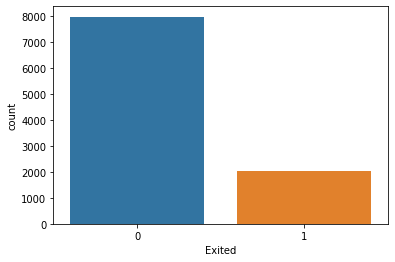

In [21]:
import seaborn as sns

sns.countplot(df['Exited'])

In [22]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [29]:
cs_churn_no = df[df.Exited == 0].CreditScore
cs_churn_yes = df[df.Exited != 0].CreditScore

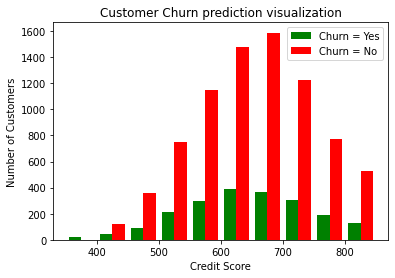

In [31]:
plt.hist([cs_churn_yes, cs_churn_no], color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.legend()
plt.xlabel('Credit Score')
plt.ylabel('Number of Customers')
plt.title('Customer Churn prediction visualization')
plt.show();

Customers with Higher Credit Score more likely to stay with the Bank

In [32]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [33]:
products_churn_no = df[df.Exited == 0].NumOfProducts
products_churn_yes = df[df.Exited != 0].NumOfProducts

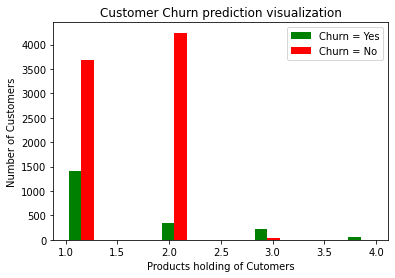

In [34]:
plt.hist([products_churn_yes, products_churn_no], color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.legend()
plt.xlabel('Products holding of Cutomers')
plt.ylabel('Number of Customers')
plt.title('Customer Churn prediction visualization')
plt.show();

Customers with 1 product holding are likely to churn more

In [35]:
cards_churn_no = df[df.Exited == 0].HasCrCard
cards_churn_yes = df[df.Exited != 0].HasCrCard

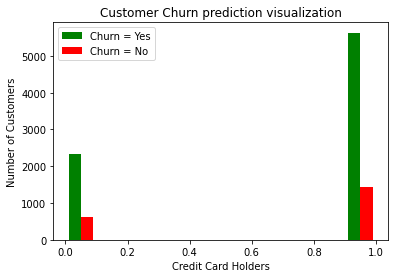

In [36]:
plt.hist([cards_churn_no, cards_churn_yes], color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.legend()
plt.xlabel('Credit Card Holders')
plt.ylabel('Number of Customers')
plt.title('Customer Churn prediction visualization')
plt.show();

Customers with credit card churned but less

In [37]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [38]:
active_churn_no = df[df.Exited == 0].HasCrCard
active_churn_yes = df[df.Exited != 0].HasCrCard

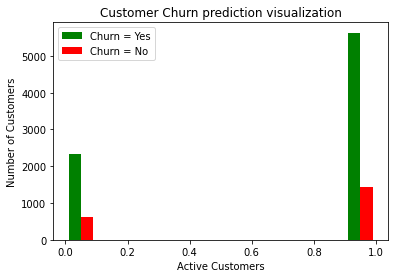

In [39]:
plt.hist([active_churn_no, active_churn_yes], color=['green', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.legend()
plt.xlabel('Active Customers')
plt.ylabel('Number of Customers')
plt.title('Customer Churn prediction visualization')
plt.show();

### Check the unique numbers in column

In [40]:
for column in df:
  print(f'{column} : {df[column].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [42]:
def print_unique_col(df):

  for column in df:
    if df[column].dtypes == 'object':
      print(f'{column} : {df[column].unique()}')

In [43]:
print_unique_col(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [45]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [46]:
df['Gender'].replace({'Male': 1, 'Female': 0}, inplace=True)

In [47]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [48]:
df['Geography'].replace({'France': 0, 'Spain': 1, 'Germany': 2}, inplace=True)

In [49]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
2747,577,0,0,35,10,0.00,2,1,1,25161.61,0
5539,614,1,1,39,3,151914.93,1,0,0,56459.45,0


In [51]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Let's Scale the data

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [53]:
for column in df:
  print(f'{column} : {df[column].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [54]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [64]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5226,481,1,1,39,1,111233.09,1,1,1,123995.15,0
8501,678,1,1,29,6,0.00,2,1,0,64443.75,0
8990,784,2,1,28,2,109960.06,2,1,1,170829.87,0


In [62]:
cols_to_scale = ['CreditScore', 'Balance', 'EstimatedSalary']

In [65]:
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [66]:
df.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8298,0.588,2,0,51,4,0.380872,1,0,0,0.363121,1
8880,0.420,0,1,49,4,0.000000,1,1,1,0.500365,1
8584,0.762,0,1,19,6,0.000000,2,1,1,0.757923,0


In [67]:
for column in df:
  print(f'{column} : {df[column].unique()}')

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

### Divide data into X and y

In [69]:
X = df.drop('Exited', axis='columns')
y = df['Exited']

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [71]:
X_train.shape

(7000, 10)

In [73]:
X_test.shape

(3000, 10)

In [74]:
X_train[:5]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2926,0.320,0,1,63,8,0.000000,2,1,1,0.576456
4634,0.520,1,0,45,3,0.000000,1,1,0,0.191345
416,0.274,2,0,61,5,0.439892,1,0,0,0.056870
6369,0.592,0,0,38,2,0.000000,2,0,0,0.893791
7952,0.792,2,0,33,2,0.429928,2,1,1,0.730974


In [75]:
len(X_train.columns)

10

### Import Tensorflow

In [76]:
import tensorflow as tf
from tensorflow import keras

### Model Building

In [77]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,), activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

In [78]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [82]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
219/219 [==============================] - 1s 4ms/step - loss: 0.4249 - accuracy: 0.8150
Epoch 2/50
219/219 [==============================] - 1s 7ms/step - loss: 0.4246 - accuracy: 0.8189
Epoch 3/50
219/219 [==============================] - 1s 3ms/step - loss: 0.4238 - accuracy: 0.8179
Epoch 4/50
219/219 [==============================] - 1s 2ms/step - loss: 0.4240 - accuracy: 0.8153
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8176
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8161
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8164
Epoch 8/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8166
Epoch 9/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8157
Epoch 10/50
219/219 [==============================] - 1s 2ms/step - loss: 0.4230 - accuracy: 0.8170

In [83]:
model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 3ms/step - loss: 0.3852 - accuracy: 0.8333


[0.38521650433540344, 0.8333333134651184]

In [84]:
yp = model.predict(X_test)
yp[:5]

94/94 [==============================] - 0s 1ms/step


array([[0.09146297],
       [0.15348054],
       [0.05969969],
       [0.06509579],
       [0.10846097]], dtype=float32)

In [85]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [86]:
y_pred = []

for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)  

In [87]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [88]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2403
           1       0.64      0.38      0.47       597

    accuracy                           0.83      3000
   macro avg       0.75      0.66      0.69      3000
weighted avg       0.82      0.83      0.82      3000



Text(51.0, 0.5, 'Truth')

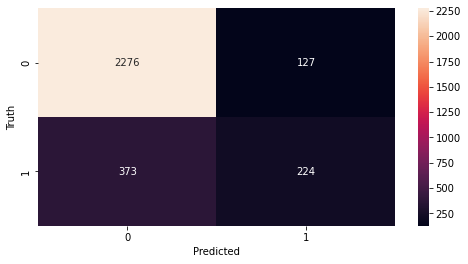

In [89]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [91]:
print("Accuracy Score : ", accuracy_score(y_test, y_pred))

Accuracy Score :  0.8333333333333334
